In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

c:\Users\EBRAHEM\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# 1. Load reviews dataset
movie_titles = pd.read_csv("movie_titles.csv")
movie_ratings = pd.read_csv('movie_ratings.data', sep='\t', names=['user_id', 'item_id', 'rating', 'date'])

In [3]:
movie_titles.shape

(1682, 2)

In [4]:
movie_titles.head(10)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [5]:
movie_ratings.shape

(100003, 4)

In [6]:
movie_ratings.tail()

,user_id,item_id,rating,date
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156
100002,12,203,3,879959583


In [7]:
#drop date column since its not needed
movie_ratings.drop(['date'], axis = 1, inplace = True)

In [8]:
movie_ratings

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3
...,...,...,...
99998,880,476,3
99999,716,204,5
100000,276,1090,1
100001,13,225,2


In [9]:
movie_ratings.describe()

,user_id,item_id,rating
count,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864
std,266.622454,330.797791,1.125704
min,0.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


In [10]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100003 non-null  int64
 1   item_id  100003 non-null  int64
 2   rating   100003 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


In [11]:
#merge both datasets
ratings = pd.merge(movie_ratings, movie_titles, on = 'item_id') 

In [12]:
ratings

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,0,172,5,"Empire Strikes Back, The (1980)"
2,0,133,1,Gone with the Wind (1939)
3,196,242,3,Kolya (1996)
4,186,302,3,L.A. Confidential (1997)
...,...,...,...,...
99998,880,476,3,"First Wives Club, The (1996)"
99999,716,204,5,Back to the Future (1985)
100000,276,1090,1,Sliver (1993)
100001,13,225,2,101 Dalmatians (1996)


In [13]:
ratings.shape

(100003, 4)

In [14]:
# 2. Data exploration
ratings.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


In [15]:
ratings_count = ratings.groupby('title')['rating'].describe()['count']

In [16]:
ratings_count

title
'Til There Was You (1997)                  9.0
1-900 (1994)                               5.0
101 Dalmatians (1996)                    109.0
12 Angry Men (1957)                      125.0
187 (1997)                                41.0
                                         ...  
Young Guns II (1990)                      44.0
Young Poisoner's Handbook, The (1995)     41.0
Zeus and Roxanne (1997)                    6.0
unknown                                    9.0
Á köldum klaka (Cold Fever) (1994)         1.0
Name: count, Length: 1664, dtype: float64

In [17]:
ratings_avg = ratings.groupby('title')['rating'].describe()['mean']

In [18]:
ratings_avg

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: mean, Length: 1664, dtype: float64

In [19]:
#### Create a dataframe having each movies average star rating along with number of ratings given
avg_ratings = pd.concat([ratings_count, ratings_avg], axis = 1)

In [20]:
avg_ratings.rename(columns={'count': 'total_reviews', 'mean': 'average_rating'}, inplace = True)

In [21]:
avg_ratings.reset_index()

,title,total_reviews,average_rating
0,'Til There Was You (1997),9.0,2.333333
1,1-900 (1994),5.0,2.600000
2,101 Dalmatians (1996),109.0,2.908257
3,12 Angry Men (1957),125.0,4.344000
4,187 (1997),41.0,3.024390
...,...,...,...
1659,Young Guns II (1990),44.0,2.772727
1660,"Young Poisoner's Handbook, The (1995)",41.0,3.341463
1661,Zeus and Roxanne (1997),6.0,2.166667
1662,unknown,9.0,3.444444


<Axes: ylabel='Frequency'>

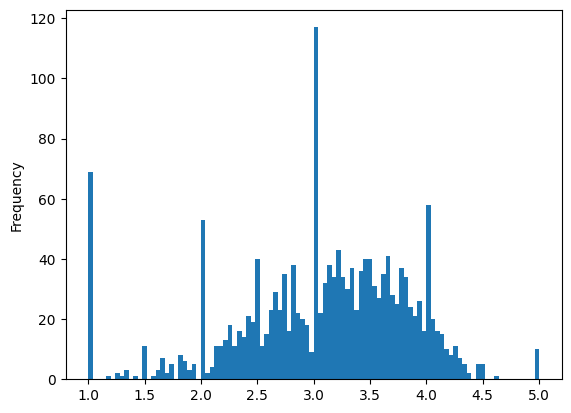

In [22]:
avg_ratings['average_rating'].plot(bins=100, kind='hist') 

<Axes: ylabel='Frequency'>

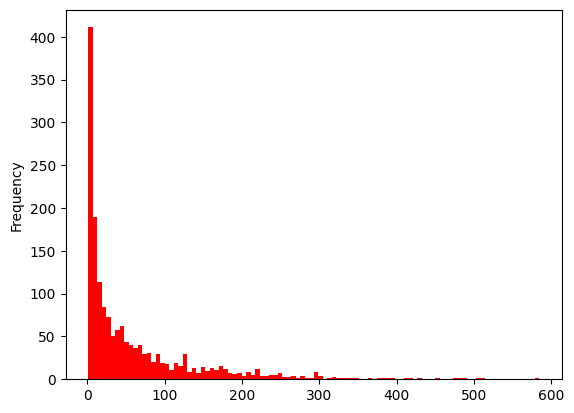

In [23]:
avg_ratings['total_reviews'].plot(bins=100, kind='hist', color = 'r') 

In [24]:
#list the highest rated movies
avg_ratings[avg_ratings['average_rating'] == 5]

,total_reviews,average_rating
title,,
Aiqing wansui (1994),1.0,5.0
Entertaining Angels: The Dorothy Day Story (1996),1.0,5.0
"Great Day in Harlem, A (1994)",1.0,5.0
Marlene Dietrich: Shadow and Light (1996),1.0,5.0
Prefontaine (1997),3.0,5.0
"Saint of Fort Washington, The (1993)",2.0,5.0
Santa with Muscles (1996),2.0,5.0
Someone Else's America (1995),1.0,5.0
Star Kid (1997),3.0,5.0


In [25]:
#list the movies that have most number of ratings recieved 
avg_ratings.sort_values('total_reviews', ascending = False).head(100)

,total_reviews,average_rating
title,,
Star Wars (1977),584.0,4.359589
Contact (1997),509.0,3.803536
Fargo (1996),508.0,4.155512
Return of the Jedi (1983),507.0,4.007890
Liar Liar (1997),485.0,3.156701
...,...,...
Aladdin (1992),219.0,3.812785
Babe (1995),219.0,3.995434
Volcano (1997),219.0,2.808219
